<a href="https://colab.research.google.com/github/blinov-89/nerel_short/blob/main/nerel_short.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets==2.1.0 seaborn==0.11.2 scikit-learn==1.0.2 gensim==4.2.0 nltk==3.7 pymystem3==0.2.0 pyLDAvis==3.3.1

In [ ]:
!python -m nltk.downloader stopwords

In [ ]:
from datasets import load_dataset
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from string import punctuation

#Create lemmatizer and stopwords list
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

nltk.download("stopwords")

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataset = load_dataset("surdan/nerel_short")

Downloading:   0%|          | 0.00/924 [00:00<?, ?B/s]

Using custom data configuration surdan--for_test_v3-eb84b899e14cc88e


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/surdan--for_test_v3-eb84b899e14cc88e/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/MLcourse/NLP/id_to_label_map.pickle', 'rb') as f:
    mapper = pickle.load(f)

In [ ]:
mapper

{0: 'O',
 1: 'I-AGE',
 2: 'B-AGE',
 3: 'B-AWARD',
 4: 'I-AWARD',
 5: 'B-CITY',
 6: 'I-CITY',
 7: 'B-COUNTRY',
 8: 'I-COUNTRY',
 9: 'B-CRIME',
 10: 'I-CRIME',
 11: 'B-DATE',
 12: 'I-DATE',
 13: 'B-DISEASE',
 14: 'I-DISEASE',
 15: 'B-DISTRICT',
 16: 'I-DISTRICT',
 17: 'B-EVENT',
 18: 'I-EVENT',
 19: 'B-FACILITY',
 20: 'I-FACILITY',
 21: 'B-FAMILY',
 22: 'I-FAMILY',
 23: 'B-IDEOLOGY',
 24: 'I-IDEOLOGY',
 25: 'B-LANGUAGE',
 26: 'I-LAW',
 27: 'B-LAW',
 28: 'B-LOCATION',
 29: 'I-LOCATION',
 30: 'B-MONEY',
 31: 'I-MONEY',
 32: 'B-NATIONALITY',
 33: 'I-NATIONALITY',
 34: 'B-NUMBER',
 35: 'I-NUMBER',
 36: 'B-ORDINAL',
 37: 'I-ORDINAL',
 38: 'B-ORGANIZATION',
 39: 'I-ORGANIZATION',
 40: 'B-PENALTY',
 41: 'I-PENALTY',
 42: 'B-PERCENT',
 43: 'I-PERCENT',
 44: 'B-PERSON',
 45: 'I-PERSON',
 46: 'I-PRODUCT',
 47: 'B-PRODUCT',
 48: 'B-PROFESSION',
 49: 'I-PROFESSION',
 50: 'B-RELIGION',
 51: 'I-RELIGION',
 52: 'B-STATE_OR_PROVINCE',
 53: 'I-STATE_OR_PROVINCE',
 54: 'B-TIME',
 55: 'I-TIME',
 56: 'B-WOR

In [ ]:
dataset

DatasetDict({
    test: Dataset({
        features: ['sequences', 'ids'],
        num_rows: 512
    })
    train: Dataset({
        features: ['sequences', 'ids'],
        num_rows: 2508
    })
    dev: Dataset({
        features: ['sequences', 'ids'],
        num_rows: 536
    })
})

In [ ]:
print(dataset["train"]["sequences"])


[['Виталий', 'Кличко', 'хочет', 'стать', 'мэром', 'Киева', 'Бывший', 'чемпион', 'мира', 'по', 'боксу', 'в', 'тяжёлом', 'весе', 'Виталий', 'Кличко', 'в', 'марте', 'будет', 'баллотироваться', 'на', 'пост', 'мэра', 'столицы', 'Украины', 'Киева'], ['Я', 'хочу', 'стать', 'мэром', 'Киева', 'так', 'как', 'я', 'очень', 'люблю', 'этот', 'город', 'и', 'хочу', 'улучшить', 'жизнь', 'в', 'нём', 'Я', 'готов', 'к', 'этому', 'шагу', 'и', 'сознаю', 'огромную', 'ответственность', 'в', 'этом', 'деле', 'так', 'сказал', 'Кличко', 'на', 'в', 'четверг'], ['Виталий', 'Кличко', 'был', 'чемпионом', 'мира', 'по', 'версии', 'WBC'], ['преследовавших', 'его', 'травм', 'в', 'ноябре', '2005', 'года', 'он', 'закончил', 'свою', 'боксёрскую', 'карьеру', 'На', 'выборы', 'мэра', 'Кличко', 'будет', 'идти', 'от', 'демократического', 'блока', 'сформированного', 'вокруг', 'молодёжного', 'движения', 'Пора', 'В', 'случае', 'победы', 'Кличко', 'обещает', 'бороться', 'с', 'коррупцией', 'и', 'способствовать', 'экономическому', 'ро

In [ ]:
print(dataset["train"]['ids'])

[[44, 45, 0, 0, 48, 5, 0, 3, 4, 0, 0, 0, 0, 0, 44, 45, 11, 12, 0, 0, 0, 0, 48, 0, 7, 5], [0, 0, 0, 48, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 0, 11, 12], [44, 45, 0, 3, 4, 0, 0, 38], [0, 0, 0, 11, 12, 12, 12, 0, 0, 0, 48, 0, 0, 17, 48, 44, 0, 0, 0, 23, 0, 0, 0, 0, 0, 38, 0, 0, 0, 44, 0, 0, 0, 9, 0, 0, 0, 0, 5], [0, 0, 17, 44, 45, 44, 45, 17, 0, 0, 0, 0, 11, 12, 12, 12, 0, 0, 0, 0, 0, 0, 17, 44, 45, 44, 45, 17, 54, 55, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 19, 20, 0, 19, 20, 44, 45, 0, 17, 28, 29, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 39, 39, 39, 38, 39, 39, 38, 7, 0, 0, 17, 0, 0, 0, 0, 0, 0, 44, 0, 0, 0, 0, 0, 52, 53, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 48], [48, 49, 49, 49, 49, 49, 49, 49, 49, 38, 39, 39, 39, 39, 39, 39, 39, 38, 39, 39, 38, 7, 0, 5, 44, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
import numpy as np
i = np.random.randint(0, len(dataset["train"]))

print(dataset["train"][i]["sequences"])


['Слова', 'поддержки', 'в', 'адрес', 'населения', 'города', 'высказали', 'прокурор', 'Техаса', 'Кен', 'Пэкстон', 'и', 'американский', 'сенатор', 'Джон', 'Корнин', 'от', 'Техаса']


In [ ]:
pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 8.2 MB 51.8 MB/s 


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer() 

In [ ]:
import tqdm
cache = {}


def lemmatize_text(text):
    tokens = []

    for word in text:
      if word not in cache:
        cache[word] = morph.parse(word)[0].normal_form
      tokens.append(cache[word])
    
    text = " ".join(tokens)
    
    return text

lemmatized = list(
    tqdm.tqdm(map(lemmatize_text, dataset['train']["sequences"]),
              total=len(dataset['train'])))

100%|██████████| 2508/2508 [00:05<00:00, 444.86it/s]


In [ ]:
lemmatized[0]

'виталий кличко хотеть стать мэр киев бывший чемпион мир по бокс в тяжёлый вес виталий кличко в март быть баллотироваться на пост мэр столица украина киев'

In [ ]:
from typing import List

def flatten(sentences: List[List[str]]) -> List[str]:
    result = []
    for sentence in sentences:
        result += sentence
    return result

words = flatten(map(lambda text: text.split(), lemmatized))
n_words = len(words)
n_unique_words = len(set(words))

print("{:,} кол-во примеров".format(len(dataset["train"])))
print("{:,} слов".format(n_words))
print("{:,} уникальных слов".format(n_unique_words))

2,508 кол-во примеров
81,072 слов
10,880 уникальных слов


In [ ]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


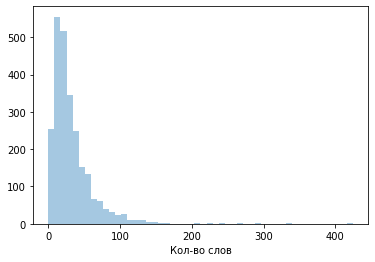

In [ ]:
sentences_length_list = list(map(lambda text: len(text), dataset['train']["sequences"]))

sns.distplot(
    pd.Series(sentences_length_list, name="Кол-во слов"),
    label="Распределение кол-ва слов",
    kde=False
)

In [ ]:
# Топ 50 часто используемых слов
pd.Series(words).value_counts().head(50)

в                4195
и                1642
на               1414
год              1290
с                 979
по                881
он                818
быть              778
что               711
о                 533
не                495
который           490
из                393
президент         393
свой              384
это               377
за                319
россия            315
стать             295
к                 265
от                254
как               253
тот               246
после             242
глава             241
сша               217
пост              217
они               212
а                 211
первый            205
этот              204
новый             199
один              194
правительство     191
для               185
также             182
она               177
человек           176
время             171
российский        169
до                163
страна            160
у                 158
партия            157
выборы            155
рф        

In [ ]:
# топ-50 часто используемых слов без учета союзов и предлогов

In [ ]:
words = [token for token in words if token not in russian_stopwords]

In [ ]:
pd.Series(words).value_counts().head(50)

год                1290
который             490
президент           393
свой                384
это                 377
россия              315
стать               295
глава               241
сша                 217
пост                217
первый              205
новый               199
правительство       191
также               182
человек             176
время               171
российский          169
страна              160
партия              157
выборы              155
рф                  145
область             138
совет               137
министр             131
день                128
весь                124
отставка            123
сообщить            121
получить            120
москва              119
закон               117
мочь                113
власть              113
назначить           112
являться            112
бывший              111
однако              110
владимир            109
решение             108
ещё                 107
должность           106
полиция         

In [ ]:
from nltk.probability import FreqDist

In [ ]:
fdist = FreqDist(words)

In [ ]:
fdist.most_common(10)

[('год', 1290),
 ('который', 490),
 ('президент', 393),
 ('свой', 384),
 ('это', 377),
 ('россия', 315),
 ('стать', 295),
 ('глава', 241),
 ('пост', 217),
 ('сша', 217)]

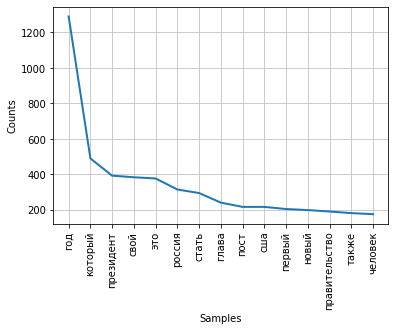

In [ ]:
fdist.plot(15,cumulative=False)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
text_raw = " ".join(words)

In [ ]:
wordcloud = WordCloud().generate(text_raw)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


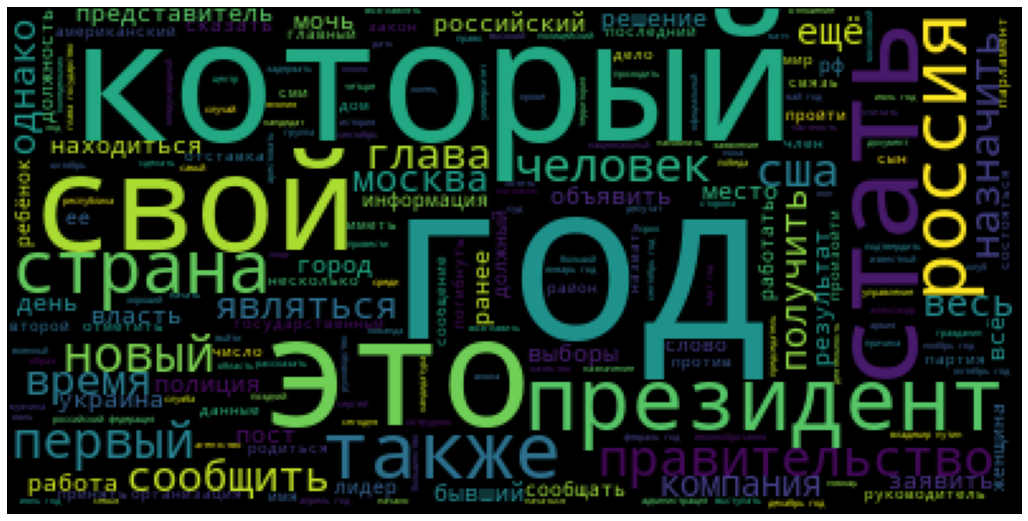

In [ ]:
fig = plt.figure(figsize=(40, 16))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud)
plt.axis('off')
plt.subplot(1, 2, 1)

## Тематические модели

In [ ]:
def remove_stop_words(text: List[str]) -> List[str]:
    return [word.lower() for word in text if word.lower() not in russian_stopwords]

In [ ]:
words = list(map(lambda t: remove_stop_words(t), dataset["train"]["sequences"]))
dictionary = corpora.Dictionary(words)

In [ ]:
words

[['виталий',
  'кличко',
  'хочет',
  'стать',
  'мэром',
  'киева',
  'бывший',
  'чемпион',
  'мира',
  'боксу',
  'тяжёлом',
  'весе',
  'виталий',
  'кличко',
  'марте',
  'баллотироваться',
  'пост',
  'мэра',
  'столицы',
  'украины',
  'киева'],
 ['хочу',
  'стать',
  'мэром',
  'киева',
  'очень',
  'люблю',
  'город',
  'хочу',
  'улучшить',
  'жизнь',
  'нём',
  'готов',
  'этому',
  'шагу',
  'сознаю',
  'огромную',
  'ответственность',
  'деле',
  'сказал',
  'кличко',
  'четверг'],
 ['виталий', 'кличко', 'чемпионом', 'мира', 'версии', 'wbc'],
 ['преследовавших',
  'травм',
  'ноябре',
  '2005',
  'года',
  'закончил',
  'боксёрскую',
  'карьеру',
  'выборы',
  'мэра',
  'кличко',
  'идти',
  'демократического',
  'блока',
  'сформированного',
  'вокруг',
  'молодёжного',
  'движения',
  'пора',
  'случае',
  'победы',
  'кличко',
  'обещает',
  'бороться',
  'коррупцией',
  'способствовать',
  'экономическому',
  'росту',
  'киева'],
 ['подозреваемый',
  'гибели',
  'марин

In [ ]:
corpus = [dictionary.doc2bow(t) for t in words]

lda_model = LdaModel(
    corpus=corpus, id2word=dictionary, num_topics=5, iterations=100, alpha='auto')

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.005*"россии" + 0.005*"года" + 0.004*"году" + 0.004*"главы" + '
  '0.003*"президента" + 0.003*"пост" + 0.003*"сша" + 0.002*"совета" + '
  '0.002*"безопасности" + 0.002*"калининградской"'),
 (1,
  '0.014*"года" + 0.004*"лет" + 0.003*"правительства" + 0.003*"2017" + '
  '0.003*"президента" + 0.003*"году" + 0.003*"президент" + 0.002*"это" + '
  '0.002*"ранее" + 0.002*"также"'),
 (2,
  '0.009*"года" + 0.004*"президента" + 0.003*"россии" + 0.003*"году" + '
  '0.003*"рф" + 0.003*"владимир" + 0.003*"министр" + 0.003*"фсэг" + '
  '0.003*"партии" + 0.003*"также"'),
 (3,
  '0.007*"года" + 0.003*"президента" + 0.003*"управления" + 0.002*"словении" + '
  '0.002*"рф" + 0.002*"лет" + 0.002*"департамента" + 0.002*"области" + '
  '0.002*"стал" + 0.002*"время"'),
 (4,
  '0.010*"года" + 0.004*"также" + 0.004*"году" + 0.003*"президента" + '
  '0.003*"области" + 0.003*"1" + 0.003*"оон" + 0.002*"россии" + '
  '0.002*"организации" + 0.002*"время"')]


In [ ]:
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()

pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.053767 -0.000223       1        1  25.602901
4      0.076885  0.051072       2        1  21.482931
2     -0.003649 -0.104879       3        1  19.931587
0     -0.044891  0.003736       4        1  17.402865
3     -0.082113  0.050293       5        1  15.579716, topic_info=            Term       Freq       Total Category  logprob  loglift
537       церкви  36.000000   36.000000  Default  30.0000  30.0000
932   управления  45.000000   45.000000  Default  29.0000  29.0000
632        путин  74.000000   74.000000  Default  28.0000  28.0000
1913     министр  65.000000   65.000000  Default  27.0000  27.0000
1870        фсэг  53.000000   53.000000  Default  26.0000  26.0000
...          ...        ...         ...      ...      ...      ...
619      который  15.150331   96.817948   Topic5  -6.4686   0.0044
637       страны  14.408079   87.432486   Topic5  -6.5188   0.0561
913         июля  13.513034   62.719534   Topic5  -6.5830   0.3242
113       россии  13.871302  187.178365   Topic5  -6.5568  -0.7430
11          пост  13.352633  130.954557   Topic5  -6.5949  -0.4239

[383 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
184       1  0.359237         1
184       2  0.304807         1
184       3  0.119746         1
184       4  0.087088         1
184       5  0.130632         1
...     ...       ...       ...
1903      1  0.310473  является
1903      2  0.172485  является
1903      3  0.155236  является
1903      4  0.310473  является
1903      5  0.051745  является

[705 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 3, 1, 4])

# TF-IDF

In [ ]:
from collections import Counter
import math

def compute_tfidf(corpus):
  def compute_tf(text):
    tf_text = Counter(text)
    for i in tf_text:
      tf_text[i] = tf_text[i]/float(len(text))
    return tf_text
  def compute_idf(word, corpus):
    return math.log10(len(corpus)/sum([1.0 for i in corpus if word in i]))

 

  documents_list = []

  for text in corpus:
    tf_idf_dictionary = {}
    computed_tf = compute_tf(text)

    for word in computed_tf:
      tf_idf_dictionary[word] = computed_tf[word] * compute_idf(word, corpus)

    documents_list.append(tf_idf_dictionary)

  return documents_list

corpus = dataset["train"]["sequences"]

print (compute_tfidf(corpus))

[{'Виталий': 0.20771980983251234, 'Кличко': 0.19647919170341707, 'хочет': 0.09600913635256673, 'стать': 0.0739310106707314, 'мэром': 0.10758721310887372, 'Киева': 0.20771980983251234, 'Бывший': 0.08341840810693865, 'чемпион': 0.10385990491625617, 'мира': 0.0653983664547177, 'по': 0.02734260423676801, 'боксу': 0.11916528986518068, 'в': 0.014518577481040181, 'тяжёлом': 0.10385990491625617, 'весе': 0.11916528986518068, 'марте': 0.09404173164305209, 'будет': 0.04956683930228577, 'баллотироваться': 0.09823959585170854, 'на': 0.0173428679376953, 'пост': 0.05036240079689542, 'мэра': 0.08550908742703837, 'столицы': 0.09068980180770977, 'Украины': 0.070427915695834}, {'Я': 0.1004590513962322, 'хочу': 0.16234479319105646, 'стать': 0.05339461881775045, 'мэром': 0.07770187613418657, 'Киева': 0.07500993132840722, 'так': 0.09925242641327463, 'как': 0.03282898855402146, 'я': 0.05054288709838524, 'очень': 0.05769745103957666, 'люблю': 0.08606382045818604, 'этот': 0.04463710674056736, 'город': 0.070950